In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split



In [2]:
df = sns.load_dataset("iris")



In [3]:
new_df = df[["sepal_length", "sepal_width", "species"]].iloc[50:]
new_df = new_df.reset_index(drop=True)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

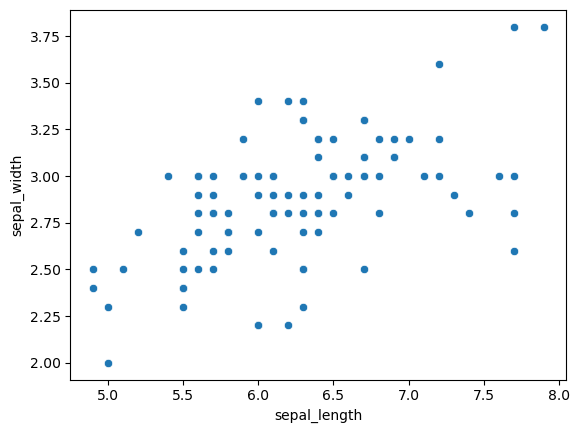

In [4]:
sns.scatterplot(data=new_df, x="sepal_length", y="sepal_width")

In [5]:
new_df

,sepal_length,sepal_width,species
0,7.0,3.2,versicolor
1,6.4,3.2,versicolor
2,6.9,3.1,versicolor
3,5.5,2.3,versicolor
4,6.5,2.8,versicolor
...,...,...,...
95,6.7,3.0,virginica
96,6.3,2.5,virginica
97,6.5,3.0,virginica
98,6.2,3.4,virginica


In [6]:
# species_to_num = {species: idx for idx, species in enumerate(set(y))}
species_to_num = {"versicolor": -1, "virginica": 1}
num_to_species = {v: k for k, v in species_to_num.items()}


In [7]:
new_df["species_num"] = new_df["species"].apply(lambda x: species_to_num.get(x))
new_df = new_df.drop(["species"], axis=1)

In [8]:
new_df

,sepal_length,sepal_width,species_num
0,7.0,3.2,-1
1,6.4,3.2,-1
2,6.9,3.1,-1
3,5.5,2.3,-1
4,6.5,2.8,-1
...,...,...,...
95,6.7,3.0,1
96,6.3,2.5,1
97,6.5,3.0,1
98,6.2,3.4,1


In [9]:
X = new_df.drop(["species_num"], axis=1).values
y = new_df["species_num"].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

In [11]:
weights = np.random.randn(X_train.shape[1])
bias = 0

learning_rate = 0.011

epochs = 500


In [12]:
for epoch in range(epochs):
	for i in range(X_train.shape[0]):
		linear_output = np.dot(X_train[i], weights) + bias
		y_pred = np.where((linear_output > 0), 1, -1)

		if(y_train[i] != y_pred):
			weights += learning_rate * y_train[i] * X_train[i]
			bias += learning_rate * y_train[i]


In [ ]:
correct_preds = 0

for i in range(X_test.shape[0]):
	linear_output = np.dot(X_test[i], weights) + bias
	y_pred = np.where((linear_output > 0), 1, -1)
                     
	if(y_test[i] == y_pred):
		correct_preds += 1

In [14]:
acc = correct_preds / X_test.shape[0]

print(f"Accuracy: {acc:0.2f}")

Accuracy: 0.52


In [15]:
new_df.values

array([[ 7. ,  3.2, -1. ],
       [ 6.4,  3.2, -1. ],
       [ 6.9,  3.1, -1. ],
       [ 5.5,  2.3, -1. ],
       [ 6.5,  2.8, -1. ],
       [ 5.7,  2.8, -1. ],
       [ 6.3,  3.3, -1. ],
       [ 4.9,  2.4, -1. ],
       [ 6.6,  2.9, -1. ],
       [ 5.2,  2.7, -1. ],
       [ 5. ,  2. , -1. ],
       [ 5.9,  3. , -1. ],
       [ 6. ,  2.2, -1. ],
       [ 6.1,  2.9, -1. ],
       [ 5.6,  2.9, -1. ],
       [ 6.7,  3.1, -1. ],
       [ 5.6,  3. , -1. ],
       [ 5.8,  2.7, -1. ],
       [ 6.2,  2.2, -1. ],
       [ 5.6,  2.5, -1. ],
       [ 5.9,  3.2, -1. ],
       [ 6.1,  2.8, -1. ],
       [ 6.3,  2.5, -1. ],
       [ 6.1,  2.8, -1. ],
       [ 6.4,  2.9, -1. ],
       [ 6.6,  3. , -1. ],
       [ 6.8,  2.8, -1. ],
       [ 6.7,  3. , -1. ],
       [ 6. ,  2.9, -1. ],
       [ 5.7,  2.6, -1. ],
       [ 5.5,  2.4, -1. ],
       [ 5.5,  2.4, -1. ],
       [ 5.8,  2.7, -1. ],
       [ 6. ,  2.7, -1. ],
       [ 5.4,  3. , -1. ],
       [ 6. ,  3.4, -1. ],
       [ 6.7,  3.1, -1. ],
 